<a href="https://colab.research.google.com/github/rubaTech/SCAI-trainning/blob/main/code_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FIFA World Cup Attendance.csv to FIFA World Cup Attendance (1).csv
Saving Premier league attendance (1).csv to Premier league attendance (1) (1).csv
Saving Football Stadiums.csv to Football Stadiums (1).csv


In [3]:
!pip install networkx pandas matplotlib scikit-learn -q

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
stadiums_df = pd.read_csv("Football Stadiums.csv", encoding='ISO-8859-1')
premier_attendance_df = pd.read_csv("Premier league attendance (1).csv", encoding='ISO-8859-1')
fifa_attendance_df = pd.read_csv("FIFA World Cup Attendance.csv", encoding='ISO-8859-1')

In [6]:
print("\nFootball Stadiums Information:")
print(stadiums_df.head())
print("\nPremier League Attendance Information:")
print(premier_attendance_df.head())
print("\nFIFA World Cup Attendance Information:")
print(fifa_attendance_df.head())


Football Stadiums Information:
   S.No Confederation                   Stadium    City  \
0     1          UEFA       Stadiumi Besëlidhja   Lezhë   
1     2          UEFA       Stadiumi Flamurtari   Vlorë   
2     3          UEFA             Stadiumi Laçi    Laçi   
3     4          UEFA      Stadiumi Niko Dovana  Durrës   
4     5          UEFA  Stadiumi Selman Stërmasi  Tirana   

                      HomeTeams  Capacity  Country  IOC  
0                    Besëlidhja      7000  Albania  ALB  
1              Flamurtari Vlorë      8200  Albania  ALB  
2                       KF Laçi      5000  Albania  ALB  
3                         Teuta     12040  Albania  ALB  
4  KF Tirana, Dinamo, Partizani      9500  Albania  ALB  

Premier League Attendance Information:
   Unnamed: 0.1  Unnamed: 0                     Team  \
0             0           0           Sunderland AFC   
1             1           1  Wolverhampton Wanderers   
2             2           2               Arsenal FC   
3

In [7]:
stadiums_df = stadiums_df[["Stadium", "Capacity", "City", "Country"]]

In [8]:
print("\nPremier League Attendance Columns:", premier_attendance_df.columns)


Premier League Attendance Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Team', 'url', '1949/1950', '1950/1951',
       '1951/1952', '1952/1953', '1953/1954', '1954/1955', '1955/1956',
       '1956/1957', '1957/1958', '1958/1959', '1959/1960', '1960/1961',
       '1961/1962', '1962/1963', '1963/1964', '1964/1965', '1965/1966',
       '1966/1967', '1967/1968', '1968/1969', '1969/1970', '1970/1971',
       '1971/1972', '1972/1973', '1973/1974', '1974/1975', '1975/1976',
       '1976/1977', '1977/1978', '1978/1979', '1979/1980', '1980/1981',
       '1981/1982', '1982/1983', '1983/1984', '1984/1985', '1985/1986',
       '1986/1987', '1987/1988', '1988/1989', '1989/1990', '1990/1991',
       '1991/1992', '1992/1993', '1993/1994', '1994/1995', '1995/1996',
       '1996/1997', '1997/1998', '1998/1999', '1999/2000', '2000/2001',
       '2001/2002', '2002/2003', '2003/2004', '2004/2005', '2005/2006',
       '2006/2007', '2007/2008', '2008/2009', '2009/2010', '2010/2011',
       '2011/2012', '2

In [9]:
try:
    premier_attendance_df = premier_attendance_df[["Season", "HomeTeam", "Attendance", "Capacity"]]
    premier_attendance_df.rename(columns={
        "HomeTeam": "Club",
        "Attendance": "Average Attendance",
        "Capacity": "Stadium Capacity"
    }, inplace=True)
except KeyError as e:
    print("Column selection error:", e)

Column selection error: "None of [Index(['Season', 'HomeTeam', 'Attendance', 'Capacity'], dtype='object')] are in the [columns]"


In [10]:
print("\nFIFA Attendance Columns:", fifa_attendance_df.columns.tolist())

if "Attendance" in fifa_attendance_df.columns:
    if "Stadium" in fifa_attendance_df.columns:
        fifa_attendance_df = fifa_attendance_df[["Year", "Attendance", "Stadium"]]
    else:
        fifa_attendance_df = fifa_attendance_df[["Year", "Attendance"]]
elif "Spectators" in fifa_attendance_df.columns:
    if "Stadium" in fifa_attendance_df.columns:
        fifa_attendance_df = fifa_attendance_df[["Year", "Spectators", "Stadium"]]
    else:
        fifa_attendance_df = fifa_attendance_df[["Year", "Spectators"]]
    fifa_attendance_df.rename(columns={"Spectators": "Attendance"}, inplace=True)
else:
    print("No Attendance-related column found in FIFA dataset!")


FIFA Attendance Columns: ['Unnamed: 0', 'Year', 'Hosts', 'Total_Attendance', 'Matches', 'Average_Attendance', 'Number', 'Venue', 'Game(s)']
No Attendance-related column found in FIFA dataset!


In [11]:
try:
    premier_attendance_df = premier_attendance_df[["Season", "Club", "Average Attendance", "Stadium Capacity"]]
    X = premier_attendance_df[["Stadium Capacity"]]
    y = premier_attendance_df["Average Attendance"]

    model = LinearRegression()
    model.fit(X, y)

    print("\nRegression Coefficient:", model.coef_[0])
    print("Intercept:", model.intercept_)

except KeyError as e:
    print("Column selection error:", e)

Column selection error: "None of [Index(['Season', 'Club', 'Average Attendance', 'Stadium Capacity'], dtype='object')] are in the [columns]"


In [12]:
try:
    premier_attendance_df = premier_attendance_df[["Season", "Club", "Average Attendance", "Stadium Capacity"]]

    X = premier_attendance_df[["Stadium Capacity"]]
    y = premier_attendance_df["Average Attendance"]

    model = LinearRegression()
    model.fit(X, y)

    print("\nRegression Coefficient:", model.coef_[0])
    print("Intercept:", model.intercept_)

    plt.figure(figsize=(8,6))
    plt.scatter(X, y, alpha=0.5)
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.title('Stadium Capacity vs. Average Attendance (Premier League)')
    plt.xlabel('Stadium Capacity')
    plt.ylabel('Average Attendance')
    plt.grid(True)
    plt.show()

except KeyError as e:
    print("Error during regression analysis:", e)

Error during regression analysis: "None of [Index(['Season', 'Club', 'Average Attendance', 'Stadium Capacity'], dtype='object')] are in the [columns]"


In [13]:
G = nx.Graph()

In [14]:
for idx, row in stadiums_df.iterrows():
    G.add_node(row['Stadium'], city=row['City'], country=row['Country'], capacity=row['Capacity'])

In [15]:
example_edges = [("Wembley Stadium", "Old Trafford"), ("Old Trafford", "Etihad Stadium")]
G.add_edges_from(example_edges)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 158 (\x9e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing 

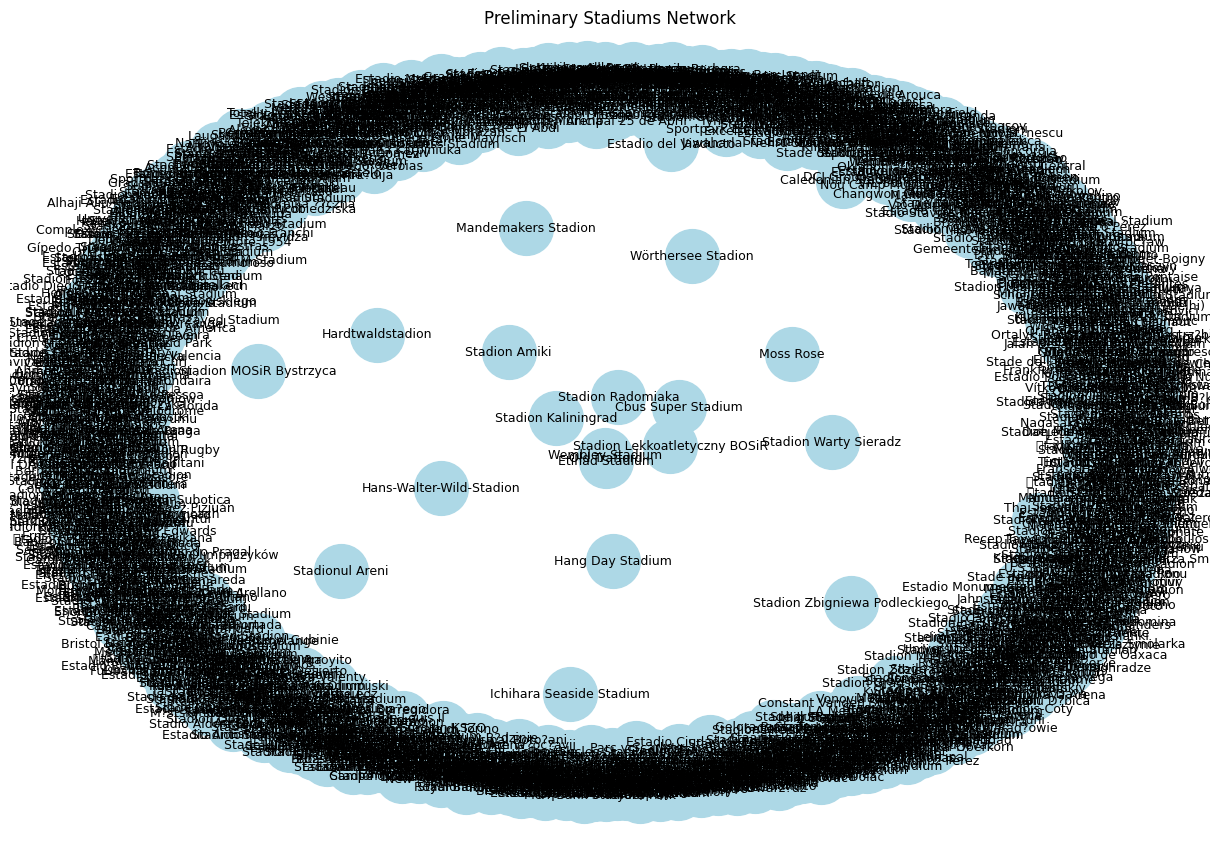

In [16]:
plt.figure(figsize=(12,8))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, font_size=9, edge_color='gray')
plt.title('Preliminary Stadiums Network')
plt.show()

In [17]:
try:
    path = nx.shortest_path(G, source="Wembley Stadium", target="Etihad Stadium")
    print("Shortest Path Between Stadiums:", path)
except Exception as e:
    print("Error finding path:", e)

Shortest Path Between Stadiums: ['Wembley Stadium', 'Old Trafford', 'Etihad Stadium']
